In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\honey\OneDrive\Masaüstü\WTECH\MTA.csv')

In [3]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,05/01/2023 01:00:00 AM,subway,52,Avenue U (Q),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,2,0,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484)
1,05/01/2023 01:00:00 AM,subway,52,Avenue U (Q),Brooklyn,omny,OMNY - Full Fare,3,0,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484)
2,05/01/2023 01:00:00 AM,subway,52,Avenue U (Q),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,1,0,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484)
3,05/01/2023 01:00:00 AM,subway,53,Neck Rd (Q),Brooklyn,metrocard,Metrocard - Full Fare,1,0,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125)
4,05/01/2023 01:00:00 AM,subway,53,Neck Rd (Q),Brooklyn,metrocard,Metrocard - Students,1,0,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190360 entries, 0 to 2190359
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            int64  
 8   transfers            int64  
 9   latitude             float64
 10  longitude            float64
 11  Georeference         object 
dtypes: float64(2), int64(2), object(8)
memory usage: 200.5+ MB


In [5]:
df.isnull().sum()

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')

In [8]:
df.columns=df.columns.str.strip()

In [9]:
df.shape

(2190360, 12)

In [10]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190360 entries, 0 to 2190359
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   transit_timestamp    datetime64[ns]
 1   transit_mode         object        
 2   station_complex_id   object        
 3   station_complex      object        
 4   borough              object        
 5   payment_method       object        
 6   fare_class_category  object        
 7   ridership            int64         
 8   transfers            int64         
 9   latitude             float64       
 10  longitude            float64       
 11  Georeference         object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 200.5+ MB


In [12]:
df.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,2023-05-01 01:00:00,subway,52,Avenue U (Q),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,2,0,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484)
1,2023-05-01 01:00:00,subway,52,Avenue U (Q),Brooklyn,omny,OMNY - Full Fare,3,0,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484)
2,2023-05-01 01:00:00,subway,52,Avenue U (Q),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,1,0,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484)
3,2023-05-01 01:00:00,subway,53,Neck Rd (Q),Brooklyn,metrocard,Metrocard - Full Fare,1,0,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125)
4,2023-05-01 01:00:00,subway,53,Neck Rd (Q),Brooklyn,metrocard,Metrocard - Students,1,0,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125)


In [13]:
df.rename(columns={'transit_timestamp': 'timestamp'}, inplace=True)

In [14]:
df['transit_mode'].unique()

array(['subway', 'tram', 'staten_island_railway'], dtype=object)

In [15]:
tram=df[df['transit_mode'] == 'tram']

In [16]:
tram.head()

,timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
327,2023-05-01 01:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Full Fare,1,0,40.761338,-73.964155,POINT (-73.964155 40.761338)
329,2023-05-01 01:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Unlimited 7-Day,1,0,40.757340,-73.954114,POINT (-73.954114 40.75734)
7491,2023-05-01 05:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Full Fare,2,0,40.761338,-73.964155,POINT (-73.964155 40.761338)
7496,2023-05-01 05:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Full Fare,5,0,40.757340,-73.954114,POINT (-73.954114 40.75734)
7497,2023-05-01 05:00:00,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Other,2,0,40.757340,-73.954114,POINT (-73.954114 40.75734)


In [17]:
# if we want to know which metro stations are the most crowded, then we should filter transit_mode=subway

In [18]:
df['transit_mode'].value_counts()

subway                   2173790
staten_island_railway       8909
tram                        7661
Name: transit_mode, dtype: int64

In [19]:
df=df[df['transit_mode'] == 'subway']

In [20]:
# renaming some categories could make it clearer to understand

In [21]:
df.rename(columns={'transit_mode': 'transportation',
                   'station_complex_id': 'station_id',
                   'station_complex': 'station',
                   'fare_class_category': 'fare_class'},
          inplace=True)

In [22]:
df.rename(columns={'borough': 'district'},inplace=True)

In [23]:
df.head()

,timestamp,transportation,station_id,station,district,payment_method,fare_class,ridership,transfers,latitude,longitude,Georeference
0,2023-05-01 01:00:00,subway,52,Avenue U (Q),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,2,0,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484)
1,2023-05-01 01:00:00,subway,52,Avenue U (Q),Brooklyn,omny,OMNY - Full Fare,3,0,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484)
2,2023-05-01 01:00:00,subway,52,Avenue U (Q),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,1,0,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484)
3,2023-05-01 01:00:00,subway,53,Neck Rd (Q),Brooklyn,metrocard,Metrocard - Full Fare,1,0,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125)
4,2023-05-01 01:00:00,subway,53,Neck Rd (Q),Brooklyn,metrocard,Metrocard - Students,1,0,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125)


In [24]:
# some columns are not necessary for us from now on, so we can drop them to work more efficiently

In [25]:
df = df.drop(['payment_method', 'fare_class','transportation'], axis=1)

In [26]:
df = df.drop(['transfers'], axis=1) # total number of passengers have already been included in the category of ridership

In [27]:
# to determine which days of the week are busy at the metro stations, we can covert the date and time columns into days of the week

In [28]:
df['weekdays'] = pd.to_datetime(df['timestamp']).dt.day_name()
df.head()

,timestamp,station_id,station,district,ridership,latitude,longitude,Georeference,weekdays
0,2023-05-01 01:00:00,52,Avenue U (Q),Brooklyn,2,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484),Monday
1,2023-05-01 01:00:00,52,Avenue U (Q),Brooklyn,3,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484),Monday
2,2023-05-01 01:00:00,52,Avenue U (Q),Brooklyn,1,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484),Monday
3,2023-05-01 01:00:00,53,Neck Rd (Q),Brooklyn,1,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125),Monday
4,2023-05-01 01:00:00,53,Neck Rd (Q),Brooklyn,1,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125),Monday


In [29]:
df.sample(5)

,timestamp,station_id,station,district,ridership,latitude,longitude,Georeference,weekdays
1251363,2023-05-18 13:00:00,351,Van Siclen Av (3),Brooklyn,21,40.665447,-73.889397,POINT (-73.88939666748047 40.66544723510742),Thursday
531362,2023-05-08 13:00:00,282,21 St (G),Queens,3,40.744064,-73.949722,POINT (-73.94972229003906 40.74406433105469),Monday
952503,2023-05-14 10:00:00,373,E 149 St (6),Bronx,5,40.812119,-73.904099,POINT (-73.90409851074219 40.81211853027344),Sunday
198303,2023-05-03 17:00:00,202,"Beach 105 St (A,S)",Queens,6,40.583210,-73.827560,POINT (-73.82756042480469 40.58320999145508),Wednesday
184321,2023-05-03 13:00:00,250,Kings Hwy (F),Brooklyn,14,40.603218,-73.972359,POINT (-73.97235870361328 40.60321807861328),Wednesday


In [30]:
# now let's find out if there are any outliers

In [31]:
df['ridership'].describe()

count    2.173790e+06
mean     4.824936e+01
std      1.528769e+02
min      1.000000e+00
25%      4.000000e+00
50%      1.300000e+01
75%      3.900000e+01
max      1.030900e+04
Name: ridership, dtype: float64

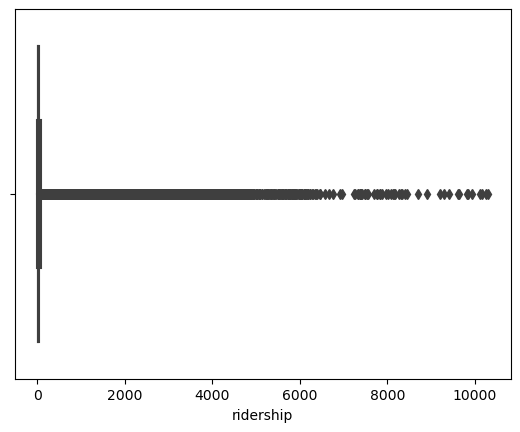

In [32]:
sns.boxplot(x=df['ridership'])
plt.show()

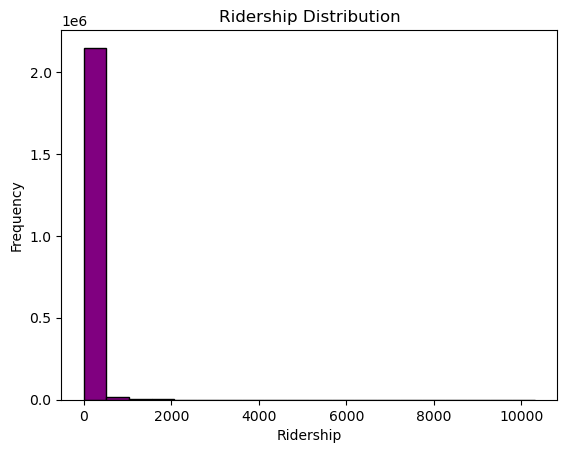

In [33]:

plt.hist(df['ridership'], bins=20, color='purple', edgecolor='black')

plt.title('Ridership Distribution')
plt.xlabel('Ridership')
plt.ylabel('Frequency')

plt.show()

In [34]:
Q1 = df['ridership'].quantile(0.25)
Q3 = df['ridership'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# for outliers
outliers_iqr = (df['ridership'] < lower_bound) | (df['ridership'] > upper_bound)
print(df[outliers_iqr]['ridership'])

110        227
4670        98
4674        95
5650       118
5778       120
          ... 
2190165    112
2190168    111
2190169    105
2190296    179
2190317    108
Name: ridership, Length: 247223, dtype: int64


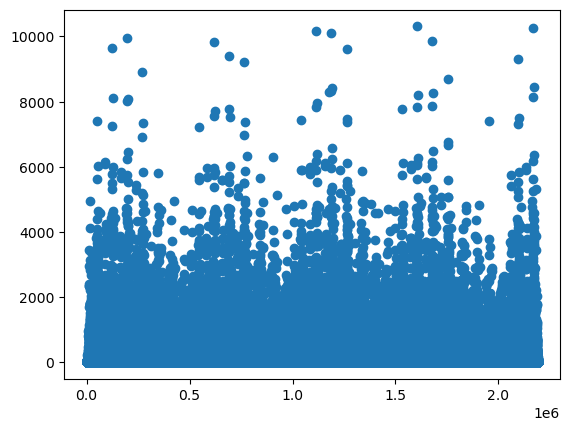

In [35]:
plt.scatter(df.index, df['ridership'])
plt.show()

In [36]:
# it seems like there is no problem, so now we can find the busiest stations

In [37]:
df.head()

,timestamp,station_id,station,district,ridership,latitude,longitude,Georeference,weekdays
0,2023-05-01 01:00:00,52,Avenue U (Q),Brooklyn,2,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484),Monday
1,2023-05-01 01:00:00,52,Avenue U (Q),Brooklyn,3,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484),Monday
2,2023-05-01 01:00:00,52,Avenue U (Q),Brooklyn,1,40.599300,-73.955933,POINT (-73.9559326171875 40.599300384521484),Monday
3,2023-05-01 01:00:00,53,Neck Rd (Q),Brooklyn,1,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125),Monday
4,2023-05-01 01:00:00,53,Neck Rd (Q),Brooklyn,1,40.595245,-73.955162,POINT (-73.95516204833984 40.595245361328125),Monday


In [38]:
df['station'].value_counts()

Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)      6532
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)    6392
Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)          6379
Grand Central-42 St (S,4,5,6,7)                       6372
34 St-Penn Station (1,2,3)                            6306
                                                      ... 
Neptune Av (F)                                        3247
Bay Pkwy (F)                                          3121
Beach 98 St (A,S)                                     2667
Broad Channel (A,S)                                   2128
Beach 105 St (A,S)                                    1977
Name: station, Length: 424, dtype: int64

In [39]:
# cleaning unnecessary characters for station names can help us get more understandable graphs in the future
df['station'] = df['station'].apply(lambda x: x.split('(')[0].strip())

In [40]:
df['station'].value_counts()

86 St            33042
23 St            28345
125 St           23114
96 St            22595
72 St            16716
                 ...  
Avenue N          3402
Neptune Av        3247
Beach 98 St       2667
Broad Channel     2128
Beach 105 St      1977
Name: station, Length: 340, dtype: int64

In [41]:
df.sample(5)

,timestamp,station_id,station,district,ridership,latitude,longitude,Georeference,weekdays
69844,2023-05-01 23:00:00,265,Grand Av-Newtown,Queens,3,40.737015,-73.877220,POINT (-73.8772201538086 40.73701477050781),Monday
906989,2023-05-13 16:00:00,326,Franklin St,Manhattan,20,40.719318,-74.006889,POINT (-74.00688934326172 40.71931838989258),Saturday
227469,2023-05-04 04:00:00,26,DeKalb Av,Brooklyn,9,40.690636,-73.981827,POINT (-73.98182678222656 40.690635681152344),Thursday
1760340,2023-05-25 19:00:00,56,Ocean Pkwy,Brooklyn,21,40.576313,-73.968498,POINT (-73.96849822998047 40.57631301879883),Thursday
1691209,2023-05-24 20:00:00,22,Rector St,Manhattan,3,40.707218,-74.013344,POINT (-74.01334381103516 40.707218170166016),Wednesday


In [42]:
# the column of 'georeference' is not necessary in this case
df = df.drop(['Georeference'], axis=1)

In [43]:
df.sample(3)

,timestamp,station_id,station,district,ridership,latitude,longitude,weekdays
1507519,2023-05-22 10:00:00,157,96 St,Manhattan,8,40.791641,-73.964699,Monday
1654889,2023-05-24 10:00:00,91,Alabama Av,Brooklyn,4,40.676991,-73.898651,Wednesday
2086085,2023-05-30 14:00:00,363,Westchester Sq-E Tremont Av,Bronx,61,40.839893,-73.842949,Tuesday


In [44]:
crowded_stations = df.groupby('station')['ridership'].sum().sort_values(ascending = False).reset_index().head(5)
crowded_stations = crowded_stations.rename(columns={'ridership': 'total_ridership'})
crowded_stations

,station,total_ridership
0,Times Sq-42 St,3800190
1,34 St-Penn Station,2783786
2,Grand Central-42 St,2696565
3,86 St,2332154
4,34 St-Herald Sq,2086140


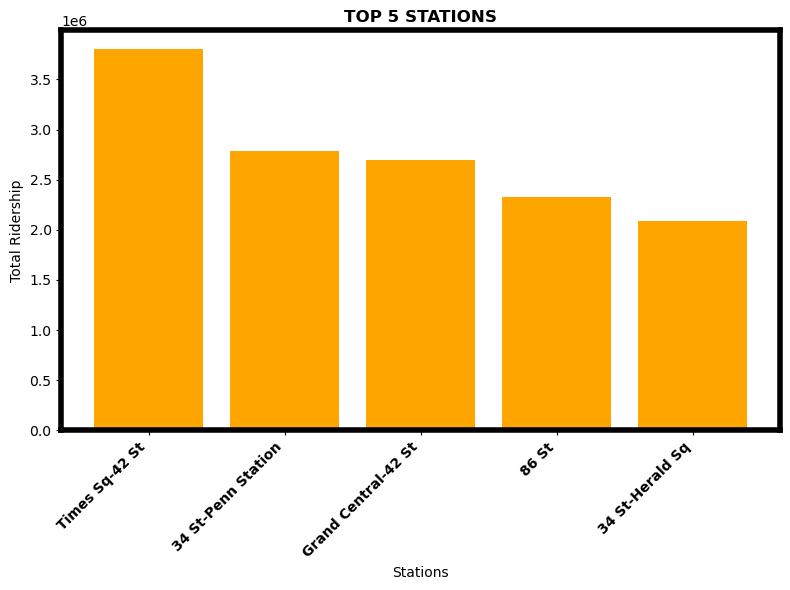

In [45]:
plt.figure(figsize=(8, 6))
sorted_crowded_stations = crowded_stations.sort_values(by='total_ridership', ascending=False)
plt.bar(sorted_crowded_stations['station'], sorted_crowded_stations['total_ridership'], color='orange', linewidth=0.5)
plt.xlabel('Stations')
plt.ylabel('Total Ridership')
plt.title('TOP 5 STATIONS', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.show()

In [46]:
crowded_days = df.groupby('weekdays')['ridership'].sum().sort_values(ascending = False).reset_index()
crowded_days = crowded_days.rename(columns={'ridership': 'total_ridership'})
crowded_days

,weekdays,total_ridership
0,Wednesday,20132056
1,Tuesday,19641236
2,Monday,16383889
3,Thursday,16030824
4,Friday,14849314
5,Saturday,9731035
6,Sunday,8115632


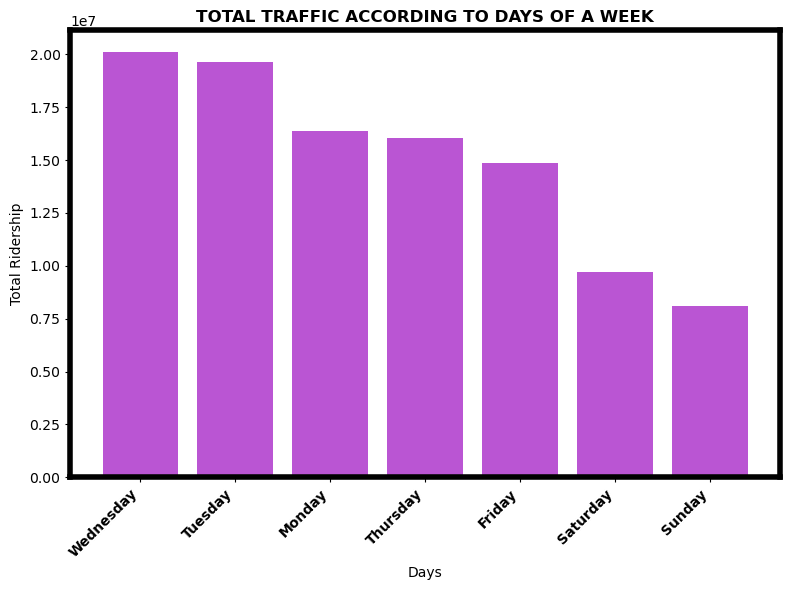

In [47]:
plt.figure(figsize=(8, 6))
plt.bar(crowded_days['weekdays'], crowded_days['total_ridership'], color='mediumorchid', linewidth=0.5)
plt.title('TOTAL TRAFFIC ACCORDING TO DAYS OF A WEEK', fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Total Ridership')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.show()

In [48]:
df['weekdays'] = pd.to_datetime(df['timestamp']).dt.dayofweek
df['is_weekend'] = (df['weekdays'] >= 5) 

weekday_grouped = df[df['is_weekend'] == False].groupby('station')['ridership'].sum().reset_index()
weekend_grouped = df[df['is_weekend'] == True].groupby('station')['ridership'].sum().reset_index()

top_weekday_stations = weekday_grouped.sort_values(by='ridership', ascending=False).head(5)
top_weekend_stations = weekend_grouped.sort_values(by='ridership', ascending=False).head(5)

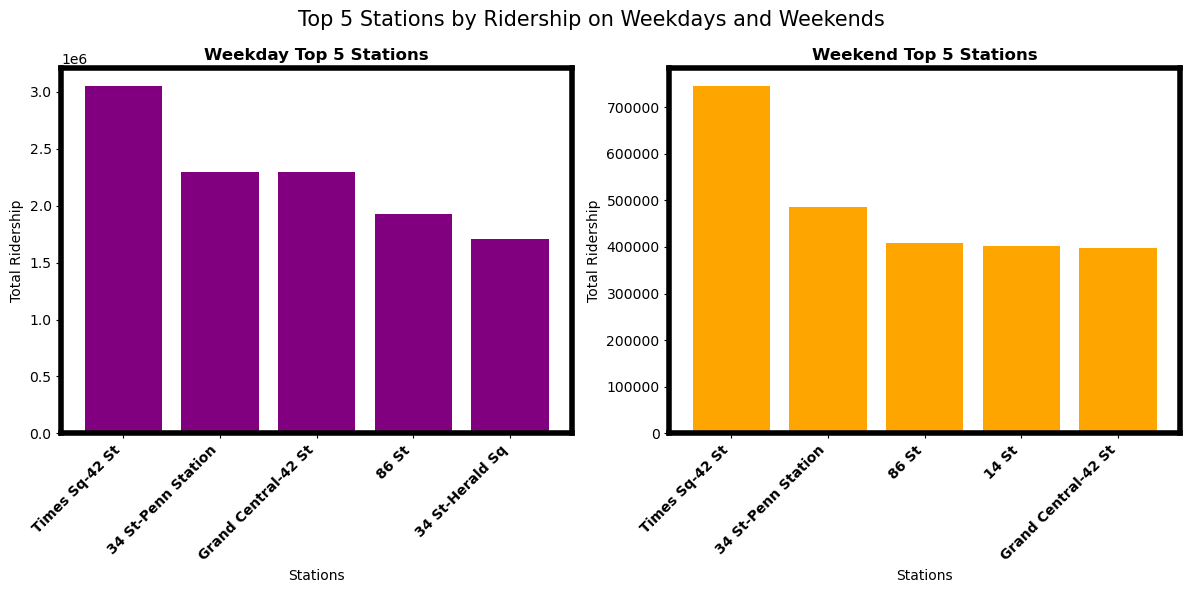

In [49]:
plt.figure(figsize=(12, 6))

plt.suptitle('Top 5 Stations by Ridership on Weekdays and Weekends ', fontsize = 15)

plt.subplot(1,2,1)
plt.bar(top_weekday_stations['station'], top_weekday_stations['ridership'], color='purple')
plt.title('Weekday Top 5 Stations',fontweight='bold')
plt.xlabel('Stations')
plt.ylabel('Total Ridership')
plt.xticks(rotation=45, ha='right', fontsize=10,fontweight='bold')
plt.tight_layout()
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)

plt.subplot(1,2,2)
plt.bar(top_weekend_stations['station'],top_weekend_stations['ridership'], color='orange')
plt.title('Weekend Top 5 Stations',fontweight='bold')
plt.xlabel('Stations')
plt.ylabel('Total Ridership')
plt.xticks(rotation=45, ha='right', fontsize=10,fontweight='bold')
plt.tight_layout()
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)

plt.tight_layout()
plt.show()

In [50]:
district_grouped = df.groupby('district')['ridership'].sum().reset_index()
top_districts = district_grouped.sort_values(by='ridership', ascending=True)

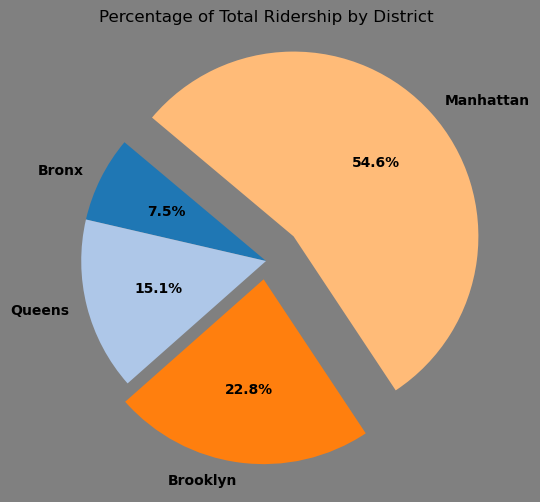

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6),facecolor='grey')
colors = plt.cm.tab20.colors
plt.pie(top_districts['ridership'] ,labels=top_districts['district'],explode = [0,0,.1,.2], colors=colors,autopct='%1.1f%%', startangle=140,textprops={'fontweight': 'bold'} )
plt.title('Percentage of Total Ridership by District')
plt.show()